# Объем гипершара

### Условие задачи

**Дано:**
- гипершар радиуса $1$ в пространстве $R^n, n=1..16$
- величины абсолютной и относительной погрешностей: $10^{-6}$, $10^{-6}$
- геометрический метод Монте-Карло

**Требуется:**
- указанным методом рассчитать объем гипершара в пространствах заданных размерностей
- в процессе расчета выводить время расчета для каждой размерности пространства
- оценить необходимое количество точек для достижения заданных погрешностей
- отобразить график объема гипершара в зависимости от размерности пространства (график 1)
- отобразить график количества точек в зависимости от размерности пространства (график 2)
- вывести разницу между полученным результатом и точными значениями (точные значения приведены на Рис. 1)

<img src='https://upload.wikimedia.org/wikipedia/commons/6/6c/Hypersphere_volume_and_surface_area_graphs.svg' width=480></img>

<center>Рис. 1. График аналитической зависимости объема и площади поверхности гипершара от размерности пространства</center>

**Описание метода:**

Возьмем случайную равномерно распределенную выборку векторов $\xi_k^{(n)}, k \in [1, 2, ..., K]$ внутри куба $[0, 1]^n$.

Пусть $T \subset [1, 2, ..., K]$ - множество индексов векторов из выборки, лежащих внутри гипершара, т.е. $||\xi_i^{(n)}|| < 1, i \in T$.

Тогда оценкой объема гипершара будет $V_K^{(n)} \approx 2^n \cdot \frac{|T|}{K}$, где $|T|$ - количество элементов множества $T$.

Для оценки вероятностной погрешности воспользуемся следующим подходом:
- $\Delta V_K^{(n)} = |V_{K+\Delta K}^{(n)} - V_K^{(n)}|$
- $s = \varepsilon_a + |V_{K+\Delta K}^{(n)}| * \varepsilon_r$
- условие $|\Delta V_K^{(n)}| / s < 1.0$ означает, что удовлетворены абсолютная и относительная погрешности


**Материалы:**
- [N-sphere](https://en.wikipedia.org/wiki/N-sphere)
- [Метод Монте-Карло](https://ru.wikipedia.org/wiki/Метод_Монте-Карло)
- [Геометрический метод Монте-Карло](https://scask.ru/f_book_cmk.php?id=56)


**Правила оценивания:**

- оценка за корректно выполненный расчет для количества измерений `n`, баллов из 100:
```
    n   =    1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,   15,   16
    g(n) = 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.1, 1.3, 1.6, 2.5, 4.5, 9.5, 21.5, 50.0
```
    
- штрафы $p(i)$, баллов:
    - не выведено время расчета - 20
    - не выведено количество точек для каждой размерности - 20
    - не построен график 1 - 20
    - не построен график 2 - 20
    - отсутствует сравнение с точными значениями - 20
    - менее значимые недоработки - 10


- итоговая оценка за задание = $\sum_{n=1}^{16}{g(n)} - \sum_{i}{p(i)}$


In [1]:
import numpy as np
import time as time

**Массив истинных значений**

In [2]:
V_true = np.array([1,2, np.pi, 4 * np.pi / 3, np.pi ** 2 / 2, 8 * np.pi ** 2 / 15, np.pi ** 3 / 6, 16 * np.pi ** 3 / 105, np.pi ** 4 / 24, 32 * np.pi ** 4 / 945, np.pi ** 5 / 120, 64 * np.pi ** 5 / 10395, np.pi ** 6 / 720, 128 * np.pi ** 6 / 135135, np.pi ** 7 / 5040, 15 * np.pi ** 7 / 118771, 0.23533063035889312])
V_true

array([1.        , 2.        , 3.14159265, 4.1887902 , 4.9348022 ,
       5.26378901, 5.16771278, 4.72476597, 4.05871213, 3.2985089 ,
       2.55016404, 1.88410388, 1.33526277, 0.91062875, 0.59926453,
       0.38144327, 0.23533063])

**Прототип**

In [ ]:
e_r = 10 ** -6
e_a = 10 ** -6

def V_n(n: int, m: int) -> tuple:
    """
    Программа-прототип:
    - на каждом шаге цикла берётся m случайных векторов размерностью n: n координат с возможным значением каждой от нуля до единицы
    - T из m векторов - вектора, лежащих в гипершаре (их модуль меньше единицы) 
    - В V_n лежит значение объёма до данного шага 
    - В V_npm выполняется пересчёт объёма с учётом результатов данного шага
    - Условием прерывания цикла является условие, что разница между 'cтарым' и 'новым' объёмом по модулю меньше погрешности
    
    Параметры:
    n : размерность пространства, в котором рассматривается гипершар (оно же количество координат в случайных векторах), целочисленное
    m : количество векторов, рассматриваемых на каждом шаге, целочисленное
    
    Возвращает: Кортеж из двух значений (V_npm, N_all):
    V_npm : последний расчитанный объём гипершара
    N_all : кол-во векторов, которое потребовалось для достижения необходимой погрешности
    """
    V_n = 0
    V_m = 0
    N_all = 0
    K = 0
    T = 0
    while True:
        K = 0
        T = 0
        for i in range(m):
            v = np.random.rand(n)
            if np.sqrt(np.sum(v ** 2)) < 1:
                T += 1
        V_m = (2 ** n) * T / m
        V_npm = (V_n * N_all + V_m * m) / (N_all + m)
        N_all += m
        if (N_all > 0):
            if (abs(V_npm - V_n) / (e_r + e_a * V_npm)) < 1:
                break
            else:
                if (N_all % (m * 10) == 0):
                    print(V_npm, N_all, " большая погрешность: ", abs(V_npm - V_n) / (e_r + e_a * V_npm))
        V_n = V_npm
    return V_npm, N_all

In [ ]:
n = 7
m = 10000
%time V = V_n(n, m)
print(V)
print(V_true[n])

4.67712 100000  большая погрешность:  1402.9022540380015
4.7091199999999995 200000  большая погрешность:  460.2054994556548
4.73984 300000  большая погрешность:  176.8642355524249
4.7635200000000015 400000  большая погрешность:  1016.4728392478188
4.772096 500000  большая погрешность:  596.4798186846484
4.779093333333333 600000  большая погрешность:  136.39658370345785
4.7797028571428575 700000  большая погрешность:  591.030978803814
4.770720000000001 800000  большая погрешность:  766.1549724791539
4.782506666666667 900000  большая погрешность:  164.9816499367074
4.773248000000001 1000000  большая погрешность:  136.38664741127795
4.776145454545455 1100000  большая погрешность:  383.50476689493894
4.76864 1200000  большая погрешность:  327.2402320888855
4.757366153846156 1300000  большая погрешность:  132.1746639795136
4.757028571428572 1400000  большая погрешность:  373.6082877058283
4.755712000000001 1500000  большая погрешность:  52.83575386515365
4.755600000000001 1600000  большая п

**Компиляция в njit**

In [4]:
import matplotlib.pyplot as plt
from numba import jit, njit, prange

In [ ]:
@njit
def V_n_njit(n: int, m: int) -> tuple:
    """
    Ускоренная программа, оптимизированная под работу с массивами numpy и функциями данной библиотеки:
    - на каждом шаге цикла берётся m случайных векторов размерностью n: n координат с возможным значением каждой от нуля до единицы
    - T из m векторов - вектора, лежащих в гипершаре (их модуль меньше единицы) 
    - В V_n лежит значение объёма до данного шага 
    - В V_npm выполняется пересчёт объёма с учётом результатов данного шага
    - Условием прерывания цикла является условие, что разница между 'cтарым' и 'новым' объёмом по модулю меньше погрешности
    
    Параметры:
    n : размерность пространства, в котором рассматривается гипершар (оно же количество координат в случайных векторах), целочисленное
    m : количество векторов, рассматриваемых на каждом шаге, целочисленное
    
    Возвращает: Кортеж из двух значений (V_npm, N_all):
    V_npm : последний расчитанный объём гипершара
    N_all : кол-во векторов, которое потребовалось для достижения необходимой погрешности
    """
    e_r = 10 ** -6
    e_a = 10 ** -6
    V_n = 0
    V_m = 0
    N_all = 0
    K = 0
    T = 0
    while True:
        K = 0
        T = 0
        for i in range(m):
            v = np.random.rand(n)
            if np.sqrt(np.sum(v ** 2)) < 1:
                T += 1
        V_m = (2 ** n) * T / m
        V_npm = (V_n * N_all + V_m * m) / (N_all + m)
        if (N_all > 0):
            if (abs(V_npm - V_n) / (e_r + e_a * V_npm)) < 1:
                break
        N_all += m
        V_n = V_npm
    return V_npm, N_all

In [ ]:
m=10000
for i in range(1, 7):
    print(i, end=' ')
    %time V = V_n_njit(i,m)
    print(V, ", V_true = ", V_true[i])

1 Wall time: 3.23 s
(2.0, 10000) , V_true =  2.0
2 Wall time: 375 ms
(3.1428999999999996, 870000) , V_true =  3.141592653589793
3 Wall time: 328 ms
(4.18992, 790000) , V_true =  4.1887902047863905
4 Wall time: 252 ms
(4.932769811320755, 520000) , V_true =  4.934802200544679
5 Wall time: 743 ms
(5.2512000000000025, 1630000) , V_true =  5.263789013914324
6 Wall time: 271 ms
(5.248, 470000) , V_true =  5.167712780049969


**Пробуем распараллелить (чтобы предотвратить проблемы плохого рандома и слишком долгих расчётов, я добавил ограничение на кол-во шагов)**

In [5]:
@njit(parallel=True, boundscheck=False)
def V_n_njit_parallel(n: int, m: int) -> tuple:
    """
    Ускоренная программа, оптимизированная под работу с массивами numpy и функциями данной библиотеки с распараллеленными процессами:
    
    - перед началом основной программы заранее расчитывается начальный объём гипершара, чтобы предотвратить случайные выходы из программы
      (например, если на двух первых шагах ни один вектор не лежал в шаре - тогда разница между ними будет нулевой (актуально для высоких пространств))
    - программа производит шаги до тех пор пока не найдёт хотя бы один вектор лежащий в гипершаре в шаге
    - на основе всех полученных векторов (за все шаги) рассчитывается начальный объём V_n
    
    - на каждом шаге цикла ПАРАЛЛЕЛЬНО берётся m случайных векторов размерностью n: n координат с возможным значением каждой от нуля до единицы
    - T из m векторов - вектора, лежащих в гипершаре (их модуль меньше единицы) 
    - В V_n лежит значение объёма до данного шага 
    - В V_npm выполняется пересчёт объёма с учётом результатов данного шага
    - Условием прерывания цикла является условие, что разница между 'cтарым' и 'новым' объёмом по модулю меньше погрешности
    
    Параметры:
    n : размерность пространства, в котором рассматривается гипершар (оно же количество координат в случайных векторах), целочисленное
    m : количество векторов, рассматриваемых на каждом шаге, целочисленное
    
    Возвращает: Кортеж из двух значений (V_npm, N_all):
    V_npm : последний расчитанный объём гипершара
    N_all : кол-во шагов, которое потребовалось для достижения необходимой погрешности
    """
    e_r = 10 ** -6
    e_a = 10 ** -6
    V_n = 0
    V_m = 0
    N_all = 0
    v = np.empty(n)
    T = 0
    while T == 0:
        for i in prange(m):
            v = np.random.rand(n)
            if np.sqrt(np.sum(v ** 2)) < 1:
                T += 1
        N_all += 1
    V_n = (2 ** n) * T / N_all / m
    while True:
        T = 0
        for i in prange(m):
            v = np.random.rand(n)
            if np.sqrt(np.sum(v ** 2)) < 1:
                T += 1
        V_m = (2 ** n) * T / m
        V_npm = (V_n * N_all + V_m) / (N_all + 1)
        if (abs(V_npm - V_n) / (e_r + e_a * V_npm)) < 1:
            break
        V_n = V_npm
        N_all += 1
    return V_npm, N_all + 1

In [6]:
m=100000
V_count = [1]
Ns = [0]
for i in range(1, 16+1):
    print("D = ", i, ':', sep='', end=' ')
    time_start = time.time()
    V = V_n_njit_parallel(i,m)
    V_count.append(V[0])
    Ns.append(V[1])
    print(V[0],", N = ", V[1], " * m , time = ", time.time() - time_start,"s, error = ", abs(V[0] - V_true[i]), sep='')

D = 1: 

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


2.0, N = 2 * m , time = 2.3256266117095947s, error = 0.0
D = 2: 3.1416638596491224, N = 57 * m , time = 0.09333992004394531s, error = 7.120605932930957e-05
D = 3: 4.188315918367348, N = 98 * m , time = 0.2386314868927002s, error = 0.0004742864190427909
D = 4: 4.935233043478261, N = 92 * m , time = 0.30375075340270996s, error = 0.0004308429335821984
D = 5: 5.271892000000001, N = 80 * m , time = 0.3223743438720703s, error = 0.008102986085677166
D = 6: 5.179433513513513, N = 74 * m , time = 0.3611576557159424s, error = 0.011720733463543631
D = 7: 4.715804444444443, N = 63 * m , time = 0.35628652572631836s, error = 0.008961525886957311
D = 8: 4.0590024347826095, N = 230 * m , time = 1.3850455284118652s, error = 0.0002903083658418737
D = 9: 3.3022601092896173, N = 183 * m , time = 1.2186410427093506s, error = 0.0037512065509113235
D = 10: 2.539484689655171, N = 290 * m , time = 2.149688720703125s, error = 0.010679350222174033
D = 11: 1.8633248554913282, N = 173 * m , time = 1.42474842071533

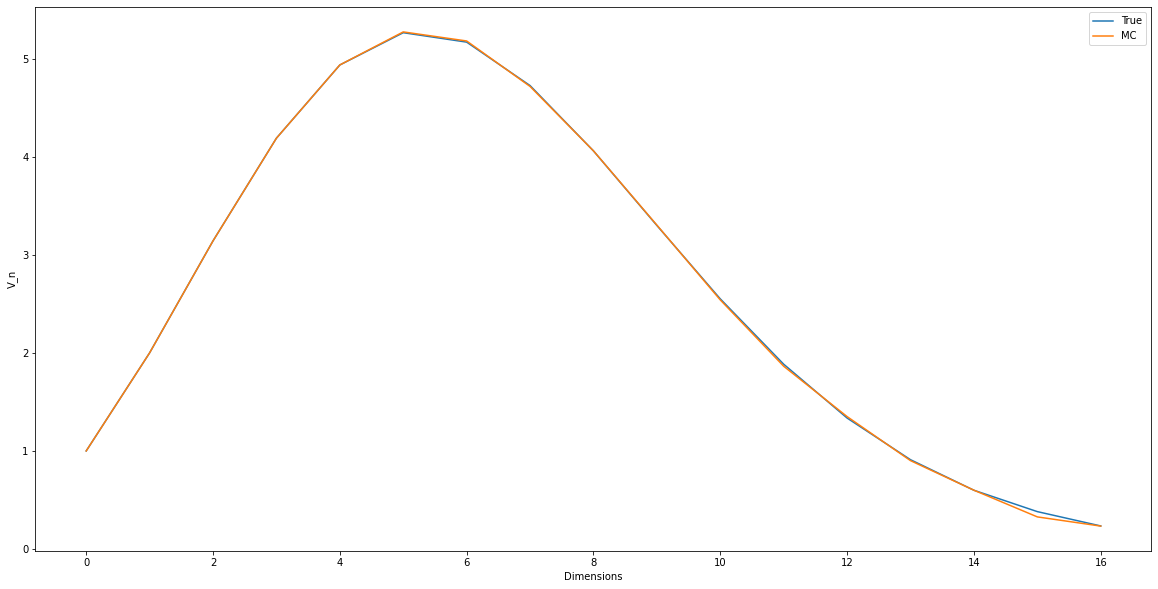

In [7]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(V_true, label="True")
ax.plot(V_count, label="MC")
ax.set_xlabel("Dimensions")
ax.set_ylabel("V_n")
plt.legend()
plt.show()

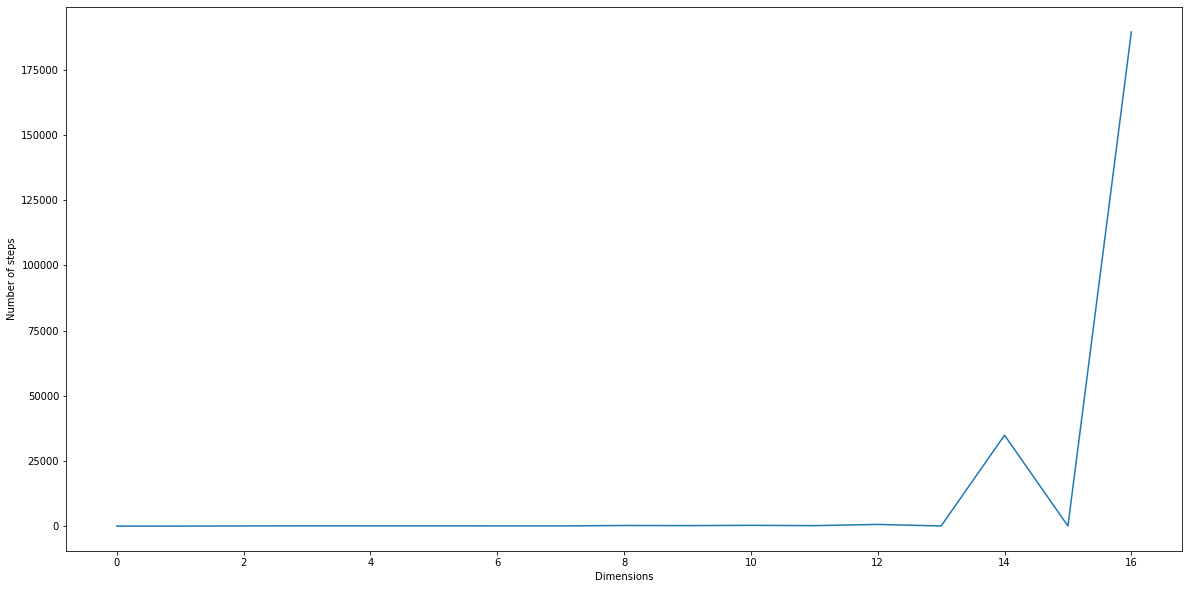

In [8]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(Ns)
ax.set_xlabel("Dimensions")
ax.set_ylabel("Number of steps")
plt.show()